In [1]:
import numpy as np
import pandas as pd
from utils.data import load_tc_data
from utils.plot import make_cmap
import matplotlib.pyplot as plt

# TODO: be sure about what's going on with inverted lats
# TODO: why are there blank images still?
# TODO: may need to look at generate_predictins_2 script to make sure the correct images are flipped

# If you have/make the file ~/.ssh/config, you can define settings to ssh from local to a BP node e.g.:
# Host bluepebble
# User yourusername
# Hostname bp1-login.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p

# Host bluepebble1
# User yourusername
# Hostname bp1-login01.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p
# Then start a notebook and make a local connection with something like:
# PORT=1234
# ssh -f -N -L 8080:localhost:$PORT bluepebble1
# ssh bluepebble1 "module load lang/python/anaconda; jupyter notebook --no-browser --port=$PORT"
# (choose a number that's likely to be unique to you for PORT. You can also insert a command to activate a given conda env after the model load part)

In [2]:
era5,era5_real,era5_input,era5_meta,mswep,mswep_real,mswep_input,mswep_meta = load_tc_data(set='extreme_valid',results='era5')

In [3]:
print(era5.shape)
print(era5[1,:,:,0])

(6553, 100, 100, 20)
[[0.68312103 0.69886726 0.53312743 ... 0.1811941  0.1162941  0.04381014]
 [0.82624984 0.81810844 0.64284974 ... 0.25911409 0.11030597 0.03318167]
 [0.68382245 0.54689038 0.32954952 ... 0.13264325 0.06032579 0.01965288]
 ...
 [0.44423655 0.64985591 0.89583617 ... 0.45460188 0.30942804 0.22257833]
 [0.50048679 0.64534885 0.56680977 ... 0.60172474 0.40658453 0.24079719]
 [0.45294788 0.47513416 0.50146019 ... 0.5113467  0.47792053 0.41773155]]


In [4]:
precip_cmap,precip_norm = make_cmap()

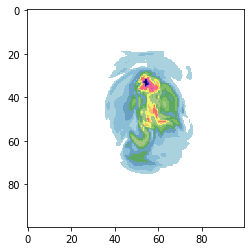

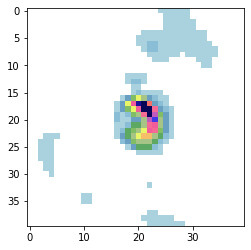

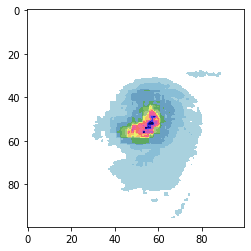

[49 49 '1992056S11102' -14.825 86.725]


In [8]:
j = 256
plt.imshow(era5[j,:,:,0],cmap=precip_cmap)
plt.show()
plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.show()
print(era5_meta.values[j,:])


In [22]:
era5_real = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_y.npy')
era5_input = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_X.npy')

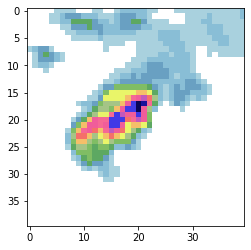

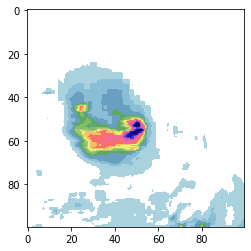

In [23]:
plt.imshow(era5_input[5,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[5,:,:],cmap=precip_cmap)
plt.show()

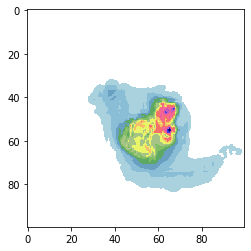

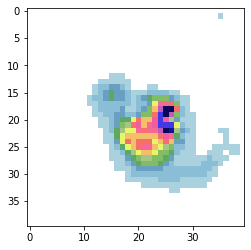

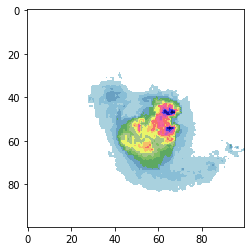

[13 13 '2012296N06135' 18.1 107.85]


In [89]:
i = 377
plt.imshow(mswep[i,:,:,0],cmap=precip_cmap)
plt.show()
plt.imshow(mswep_input[i,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(mswep_real[i,:,:],cmap=precip_cmap)
plt.show()
print(mswep_meta.values[i,:])

[ 50  49  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33
  32  31  30  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15
  14  13  12  11  10   9   8   7   6   5   4   3   2   1   0  -1  -2  -3
  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21
 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39
 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


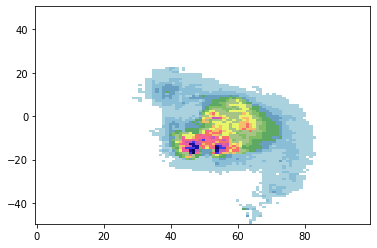

In [85]:
lats = np.arange(50,-50,-1)
lons = np.arange(0,100,1)

print(lats)
print(lons)

lat2d,lon2d = np.meshgrid(lats,lons)
# data = data.where(data>0.00001)

# plot
fig, ax = plt.subplots()

c = ax.pcolor(lon2d,lat2d,mswep_real[i,:,:],cmap = precip_cmap)
plt.show()



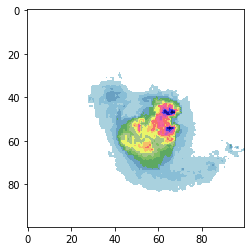

In [90]:
plt.imshow(mswep_real[i,:,:],cmap=precip_cmap)
plt.show()

In [24]:
era5_flipped_X = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_X.npy')
era5_flipped_y = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_y.npy')

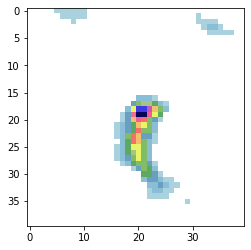

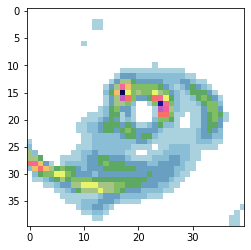

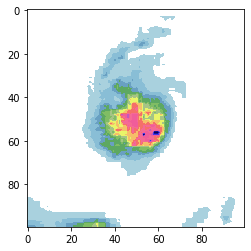

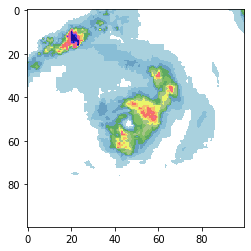

In [25]:
plt.imshow(era5_flipped_X[250,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_flipped_y[250,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.show()

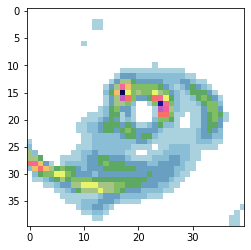

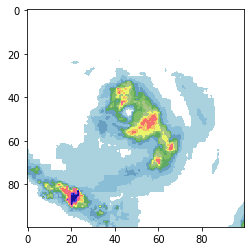

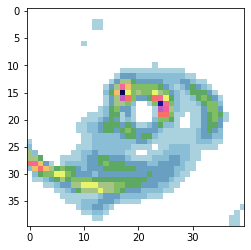

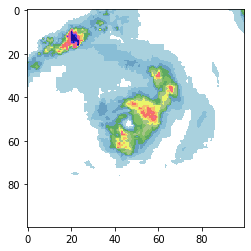

[15 15 '2008206N22133' 23.525 121.3]


In [26]:
X = np.load('/user/work/al18709/tc_data_era5_flipped_40/extreme_valid_X.npy')
y = np.load('/user/work/al18709/tc_data_era5_flipped_40/extreme_valid_y.npy')
j=15
plt.imshow(X[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(y[j,:,:],cmap=precip_cmap)
plt.show()


plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.show()

print(era5_meta.values[j,:])